# Consignes

## Questions Préliminaires:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("CRM_data.csv")
#data.count() / data.shape[0] * 100

In [9]:
data.describe()

,Stagename_bin,Amount,Won,Cost_of_lead,Gagné,Perdu,primary_residence,rental_investment,secondary_residence,month,day,year
count,3606.000000,3606.000000,368.0,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.0
mean,0.102052,155.906267,1.0,3.660843,0.102052,0.897948,0.798114,0.184415,0.015807,1.966999,14.270937,2019.0
std,0.302759,57.456713,0.0,11.148527,0.302759,0.302759,0.401463,0.387876,0.124746,0.809629,8.571415,0.0
min,0.000000,50.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2019.0
25%,0.000000,108.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,2019.0
50%,0.000000,157.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,14.000000,2019.0
75%,0.000000,205.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,21.000000,2019.0
max,1.000000,285.000000,1.0,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,31.000000,2019.0


In [4]:
#9. Renommer les colonnes 'Lost reason' et 'Source of lead' en 'Lost_reason' et 'Source_of_lead'
data.rename(columns={"Lost reason" : "Lost_reason",
                     "Source of lead" : "Source_of_lead",
                     "Lost date" : "Lost_date",
                     "Cout du lead" : "Cost_of_lead"}, inplace = True)
data['Cost_of_lead'].fillna(0, inplace = True)


In [5]:
#2. Donner la proportions de valeurs manquantes pour chaque colonne
missing_filling_rate = data.isna().sum() / data.shape[0] * 100

#3. Compter le nombre de valeurs uniques pour chaque colonne
unique_data = data.nunique()

#4. Donner ces valeurs
unique = data.apply(lambda col: col.unique())

#5. Convertir les 2 colonnes associées à une date au format date de Python
data["Subscribe date"] = pd.to_datetime(data["Subscribe date"])
data["Lost_date"] = pd.to_datetime(data["Lost_date"])

#6. Créer une nouvelle colonne 'Stagename_bin' qui sera formée de valeurs égales à 0 si Perdu, 1 si gagné
data.insert(2, column = "Stagename_bin", value = data["Stagename"].apply(lambda x: 1 if x == "Gagné" else 0))

#6bis. Créer une 3ème colonne en appliquant la méthode 'get_dummies()' 
dummies = pd.get_dummies(data["Stagename"])
data = data.join(dummies)

#7. Combien y-a-t-il de leads gagnés dans ce dataset ?
data["Stagename_bin"].value_counts()

#8. Faire la même chose que les 2 colonnes précédentes pour la colonne Project type
dummies2 = pd.get_dummies(data["Project type"])
data = data.join(dummies2)

#10. Grouper toutes les lignes en fonction 'Source_of_lead'. Lors du groupement, ne conserver que la somme de amount
data.groupby("Source_of_lead")["Amount"].sum()

#11. Créer une colonne intitulée 'total' qui correspond à la somme de 'Gagné' et 'Perdu'.
data["Total"] = data["Gagné"] + data["Perdu"]

#A quoi est égale cette colonne 
sum(data["Total"])

#12. Supprimer la dernière colonne créée vu qu'elle est inutile
data.drop("Total", axis=1, inplace = True)

#13. Pour la colonne 'Lost_reason', lorsque c'est le cas, remplacer '/' par '-'
data["Lost_reason"] = data["Lost_reason"].apply(lambda x: x.replace("/", "-") if type(x) == str else x)

#14. Remplacer les élément NaN de la colonne 'Property kind' par 'other'
data["Property kind"] = data["Property kind"].fillna("other")



## Questions  + Tracer des courbes comparatives: 

[]

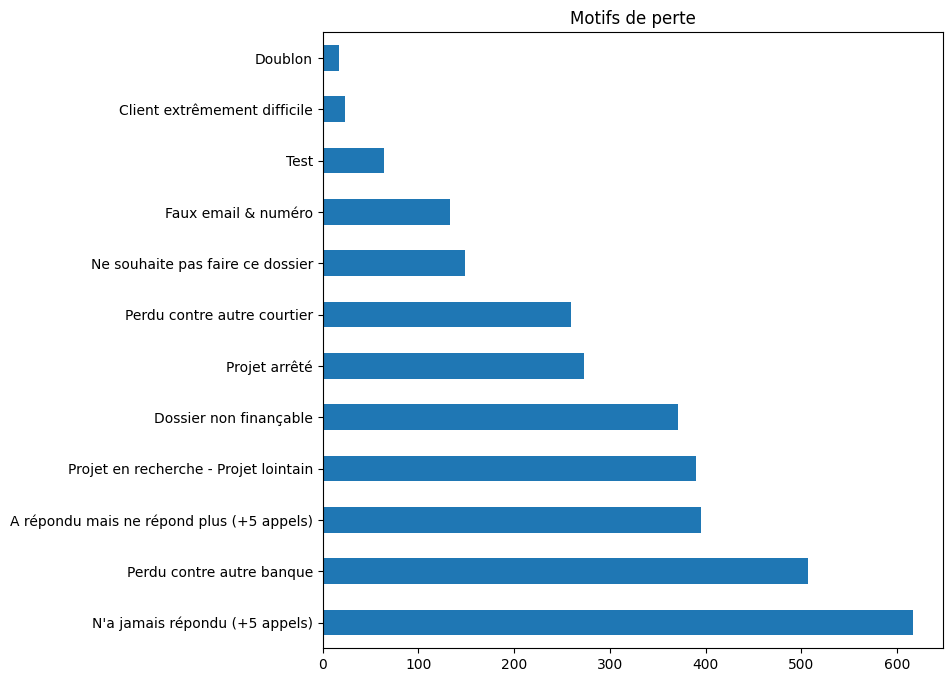

In [6]:

#data['MM-DD'] = data['Subscribe date'].dt.strftime('%m-%d')

#1. Quel est le montant moyen des inscriptions par mois ?
#- Amount: Montant du projet (gain si le projet est gagné)
data['month'] = data['Subscribe date'].dt.month.to_frame()
data['day'] = data['Subscribe date'].dt.day.to_frame()
data['year'] = data['Subscribe date'].dt.year.to_frame()
data.groupby("month")["Amount"].mean()

#2. Calculer l'évolution du taux de conversion par jour. 
#On s'attend à avoir un groupement par mois et par jour et un taux de conversion
#2bis. Tracer la courbe du taux de conversion en fonction du temps 
new_data = pd.DataFrame
new_data = data["month"].to_frame()
new_data["day"] = data['day'].to_frame()
new_data["Taux_conversion"] = data["Stagename_bin"].to_frame()
taux = new_data.groupby(["month", "day"]).mean()*100


#3. Quelles sont les principales raisons de pertes des dossiers (Colonne: "Lost Reason").
#A vous de définir comment faire... (Il y a plusieurs façons d'y parvenir)

df1 = data[data["Stagename"] == "Perdu"]
df1 = df1.drop(columns=["Gagné", "Stagename_bin", "Perdu", "primary_residence", "rental_investment", "secondary_residence"])

#df1["Lost_reason"].value_counts().plot(kind = "barh", figsize = (5, 5))
#df2 = df1["Lost_reason"].value_counts().plot(kind = "pie", figsize = (8, 8), title = 'Motifs de perte', legend = True)


import matplotlib.pyplot as plt


ax = df1["Lost_reason"].value_counts().plot(kind = "barh", figsize = (8, 8)) # if Pie =>> autopct='%.1f%%')
ax.set_title("Motifs de perte",color='black')
#ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()



Je sélectionne uniquement les dossiers perdu pour les convertir dans un nouveau dataframe.
Je groupe par motif de perte et ensuite je compte toutes mes valeurs et je les compares.

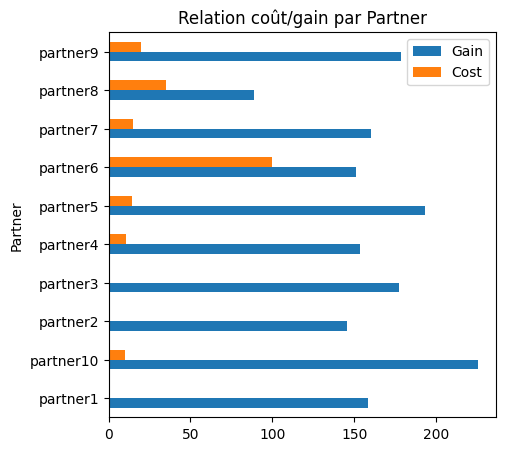

In [7]:


#4. Le directeur marketing souhaite retravailler la répartition de sonbudget par canal. 
#Quelles recommandations feriez-vous


df = data[data["Stagename"] == "Gagné"]
df = df.rename(columns={"Amount":"Gain", "Cost_of_lead":"Cost"})
df = df.drop(columns=["Gagné", "Stagename_bin", "Perdu", "primary_residence", "rental_investment", "secondary_residence"])
#df.count() / df.shape[0] * 100
ax = df.groupby("Source_of_lead").aggregate({'Gain':'mean','Cost':'mean'}).plot(kind='barh',xlabel = "Partner", ylabel = "Moyenne",figsize=(5, 5))
ax.set(title="Relation coût/gain par Partner");






Je Séléctionne uniquement les dossiers gagné pour les convertir dans un nouveau dataframe.
Je groupe par partner et ensuite je fais une moyenne des gains et des couts afin de les comparer.
plot pour le graph

#5. Pensez-vous à des indicateurs ou graphes non réalisés plus hauts qui seraient utiles à réaliser pour mieux
#comprendre le sujet ? (les réaliser)


#6. Au vu des questions posées dans la rubrique question, aurait-il été intéressant de supprimer les lignes pour lesquelles 'Cout du lead' = np.nan ?
 - Non

#7. Est-il pertinent de remplacer les éléments NaN de la colonne 'Won' par 0 ? Si oui, le faire sinon laisser tel quel
 - Oui



